In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples
from scipy import stats
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import numpy
import pandas
import matplotlib
import seaborn
import sklearn

print("numpy version:", numpy.__version__)
print("pandas version:", pandas.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", seaborn.__version__)
print("scikit-learn version:", sklearn.__version__)


numpy version: 1.23.5
pandas version: 1.5.3
matplotlib version: 3.7.1
seaborn version: 0.12.2
scikit-learn version: 1.2.2


# Applied Porject Machine Learning
## Pre-Processing
### Tidy and Clean
We load the file "fruits.csv" and we visualise it to observe the type of data.

First we visualise the dataset to know the type of data and variables we are going to handle, so we can analyse and establish the steps we will follow to carry out a correct preprocessing of the data.

In [ ]:
csv_file = '/content/drive/MyDrive/Machine Learning/fruits.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_fruits = pd.read_csv(csv_file)

In [ ]:
df_fruits.head()

,Unnamed: 0,weight,length,width,regularity,cleft
0,0,1.205,4.603915,2.847,5.691634,Small
1,1,1.726,5.978000,3.594,4.539000,Large
2,2,1.126,4.516534,2.710,5.965993,Average
3,3,1.755,5.791000,3.690,5.366000,Large
4,4,1.238,4.666888,2.989,6.153947,Small


Using the head command we can visualise the type of data and variables that compose the set "fruits.csv".
At first look we can already see a column without a title that does not provide any relevant information.

This is named "Unnamed: 0" and corresponds to a first column of the dataset indicating the row number. When converting the dataset to a pandas dataframe, another extra column without header appears by default, indicating the row number.

Therefore this first column will be removed.

Before that we visualise different dataframe parameters to observe the consistency of the data using the 'describe' function.


In [ ]:
df_fruits.describe()

,Unnamed: 0,weight,length,width,regularity
count,180.000000,168.000000,156.000000,163.000000,170.000000
mean,89.500000,2.042863,5.382412,3.244865,3.989641
std,52.105662,7.530563,0.696904,0.378125,1.629388
min,0.000000,1.059000,4.236811,2.630000,0.765100
25%,44.750000,1.218000,4.656544,2.911000,2.732250
50%,89.500000,1.431000,5.512000,3.232000,3.973123
75%,134.250000,1.682500,5.979250,3.538500,5.159713
max,179.000000,99.000000,6.666000,4.032000,8.986146


Looking at the description of the data of the different variables, it can be stated that there are missing values in all columns, since, out of the 179 values of each variable in the dataframe, in each column there seems to be a % of null or missing values.
We will deal with them below.

In addition, we can observe consistent mean, minimum, maximum, etc, values for the different columns with the exception of the maximum value of the "weight" variable which appears as 99.0

This value seems strange and not consistent with the values of this characteristic and will be reviewed.

Finally, it is important to remember that this description does not include information on the last variable "cleft", as it does not contain numerical data.

In [ ]:
print(df_fruits.dtypes)

Unnamed: 0      int64
weight        float64
length        float64
width         float64
regularity    float64
cleft          object
dtype: object


In [ ]:
df_fruits.columns

Index(['Unnamed: 0', 'weight', 'length', 'width', 'regularity', 'cleft'], dtype='object')

### Feature selection
As mentioned above, the column "Unnamed: 0" does not seem to provide relevant information as far as parameters and fruit data are concerned, so we have decided to remove it with the 'drop' function of the pandas library.

In [ ]:
df_fruits = df_fruits.drop(["Unnamed: 0"], axis=1)

In [ ]:
# We can see a head of the dataset without the wrong column
df_fruits.head()

,weight,length,width,regularity,cleft
0,1.205,4.603915,2.847,5.691634,Small
1,1.726,5.978000,3.594,4.539000,Large
2,1.126,4.516534,2.710,5.965993,Average
3,1.755,5.791000,3.690,5.366000,Large
4,1.238,4.666888,2.989,6.153947,Small


Boxplot with the distribution of the data. An anomalous value of 99 can be seen in the variable "weight".

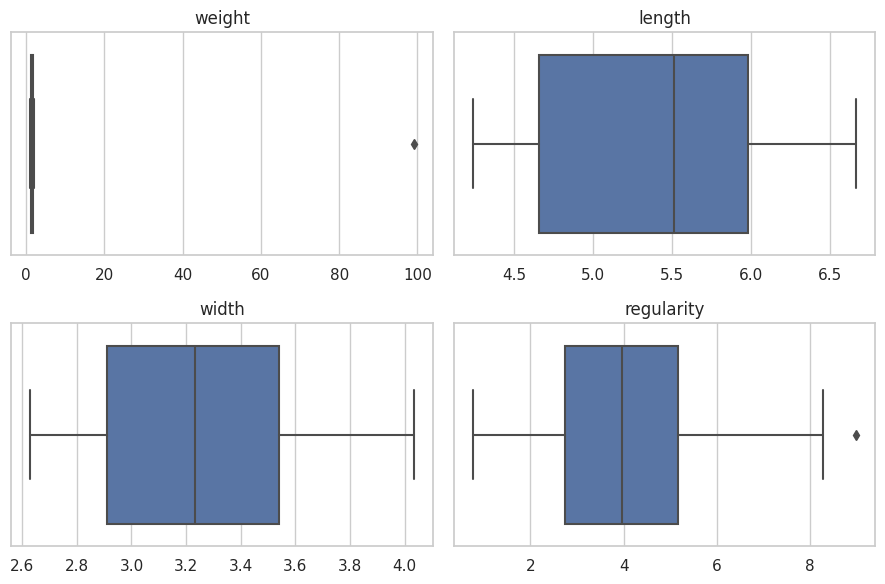

In [ ]:
#Cleft is removed to represent only numeric variables.
df_fruits_no_cleft = df_fruits.drop('cleft', axis=1)


sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))

for i, column in enumerate(df_fruits_no_cleft.columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df_fruits_no_cleft[column], orient='h')
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

## Missing Values
### Imputation

As mentioned above, the anomalous data corresponding to the "weight" variable is reviewed and it is decided to replace it with the average of the other values in the column, since, when compared with these, everything seems to indicate that it is an error.

In [ ]:
# We go through the "weight" variable looking for anomalous values, in this case greater than 15.
# Only one appears with a value of 99.
for row in df_fruits['weight']:
  if row >= 15:
    print(row)

99.0


The outlier value of 99 is replaced by the mean value of the variable "weight".

In [ ]:
# This outlier value of 99 is replaced by the mean value
df_fruits.loc[df_fruits['weight'] == 99.0, 'weight'] = df_fruits['weight'].mean()

df_fruits.describe()

,weight,length,width,regularity
count,168.000000,156.000000,163.000000,170.000000
mean,1.465737,5.382412,3.244865,3.989641
std,0.287707,0.696904,0.378125,1.629388
min,1.059000,4.236811,2.630000,0.765100
25%,1.218000,4.656544,2.911000,2.732250
50%,1.431000,5.512000,3.232000,3.973123
75%,1.682500,5.979250,3.538500,5.159713
max,2.097000,6.666000,4.032000,8.986146


Finally, all data are consistent

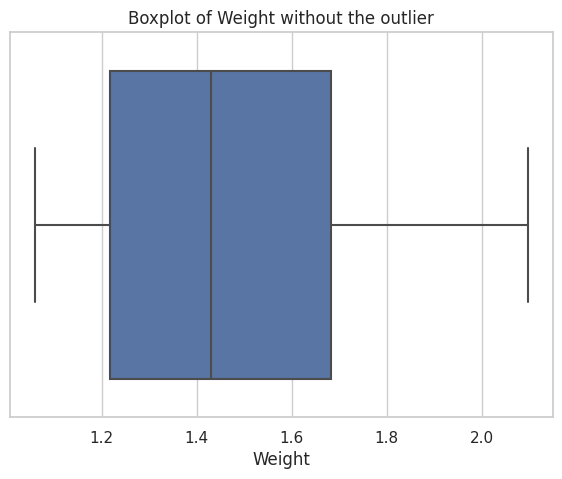

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.boxplot(x=df_fruits['weight'], orient='h')

plt.title('Boxplot of Weight without the outlier')
plt.xlabel('Weight')
plt.show()

### Handle missing values
Once the one non-zero outlier has been imputed, it is necessary to handle the missing data.

First, the following code counts the missing values by rows, to see if there are rows with all missing values, in which case they would be deleted.


In [ ]:
# Calculate the number of missing values per row

def count_missing_values_per_row(df_fruits):

    missing_values_per_row = df_fruits.isnull().sum(axis=1)

    # Contar cuántas filas tienen 0, 1, 2, 3, 4 o 5 valores faltantes
    count_per_missing_values = missing_values_per_row.value_counts().sort_index()

    # Crear la cadena de texto formateada
    result = "The number of missing values contained in each row is:\n"
    for num_missing_values, count in count_per_missing_values.items():
        result += f"Rows with {num_missing_values} {'value' if num_missing_values == 1 else 'missing'} values{'s' if num_missing_values != 1 else ''}: {count}\n"

    return result

result_string = count_missing_values_per_row(df_fruits)
print(result_string)

The number of missing values contained in each row is:
Rows with 0 missing valuess: 122
Rows with 1 value values: 53
Rows with 2 missing valuess: 5



There are no rows with all or almost all of their values missing so no rows are deleted. There are only 5 rows that have two missing values so it is not considered sufficient to delete them.
Therefore an imputation will be performed.

Next, with the following codes we show the % and the number of missing data in each column to better visualise them and decide how to handle them.

In [ ]:
total = df_fruits.isnull().sum().sort_values(ascending=False)
percent = (df_fruits.isnull().sum()/df_fruits.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '% of missin values'])
missing_data.head(20)

,Total,% of missin values
length,24,13.333333
width,17,9.444444
weight,12,6.666667
regularity,10,5.555556
cleft,0,0.000000


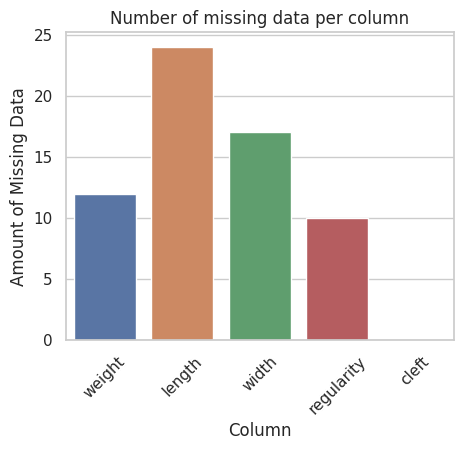

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart showing the amount of missing data in each column
missing_data = df_fruits.isnull().sum()
plt.figure(figsize=(5, 4))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.title('Number of missing data per column')
plt.xlabel('Column')
plt.ylabel('Amount of Missing Data')
plt.xticks(rotation=45)
plt.show()

Modify the headers to provide information about the units of the data.

Before carrying out the imputation, it was decided to modify the headers so that they contain the units of measurement of each variable and to keep this information in mind at all times.

In [ ]:
df_fruits.columns = ['weight(kg)', 'length(cm)', 'width(cm)', 'regularity', 'cleft']

In [ ]:
df_fruits.head(2)

,weight(kg),length(cm),width(cm),regularity,cleft
0,1.205,4.603915,2.847,5.691634,Small
1,1.726,5.978000,3.594,4.539000,Large


### Transform
## Imputation:

As mentioned above, it has been decided to impute the missing values. Therefore, before doing so, different graphs and information have been extracted in order to choose the most suitable imputation method.

First of all, a heat map with the dependence of the numerical variables on each other can be observed. All of them are very close except for "regularity" which is a symmetry coefficient.

Secondly, a pairplot has been plotted to observe the direct relationship of the variables. Observing this, it has been decided to plot a distplot with kde to observe the trend of the data for each variable.


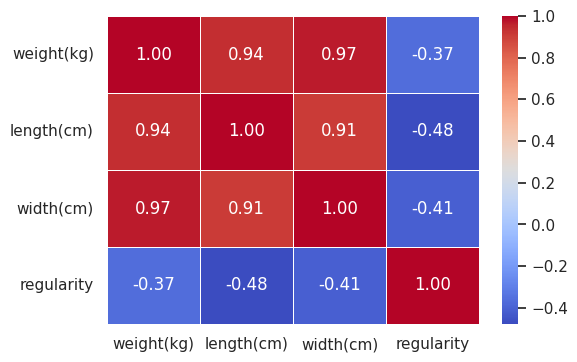

In [ ]:
correlation_matrix = df_fruits.corr()

# Crea un heatmap con la matriz de correlación
plt.figure(figsize=(6,4))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

<Figure size 1000x800 with 0 Axes>

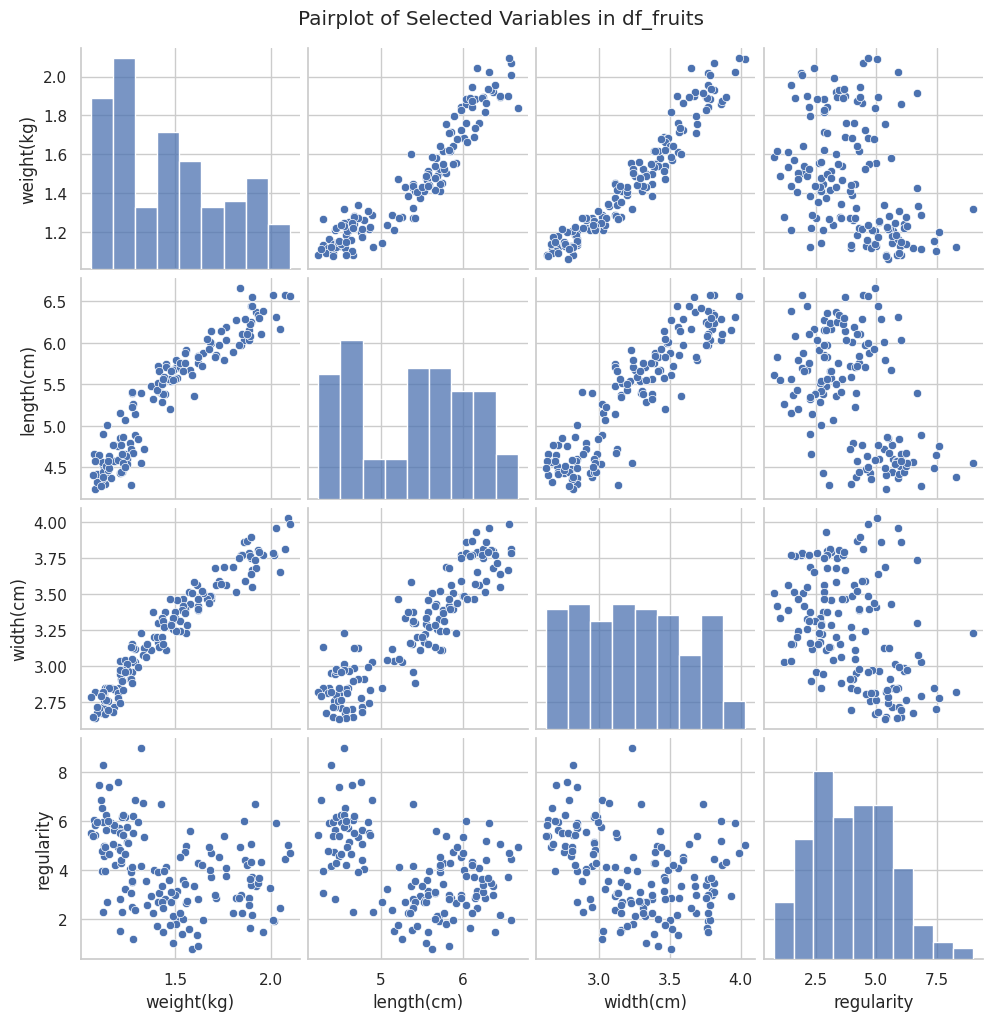

In [ ]:
import seaborn as sns

selected_columns = ['weight(kg)', 'length(cm)', 'width(cm)', 'regularity']

df_selected = df_fruits[selected_columns]
plt.figure(figsize=(10, 8))
sns.pairplot(df_selected)
plt.suptitle('Pairplot of Selected Variables in df_fruits', y=1.02)
plt.show()

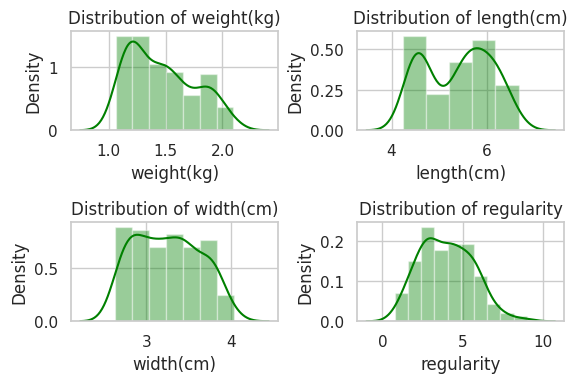

In [ ]:
numeric_columns = ['weight(kg)', 'length(cm)', 'width(cm)', 'regularity']

num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 4))

# Iteration through columns and create distribution charts with KDE
for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    sns.distplot(df_fruits[column], color='green', kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')

plt.tight_layout()

plt.show()


As can be seen from the set of distribution charts, the distribution of the values of the variables follows a normal distribution.

It is decided to perform an imputation by substituting the missing values by the average value of the corresponding column.

In [ ]:
numeric_columns = df_fruits.select_dtypes(include=[float])
average_value = numeric_columns.mean()
df_fruits[numeric_columns.columns] = df_fruits[numeric_columns.columns].fillna(average_value)

In [ ]:
# no null values left
df_fruits.isnull().sum().max()

0

##Encoding
### Categorical to Numerical
In the following, it has been decided to perform an Ordinal Encoding on the values of the categorical column "cleft".


In [ ]:
# Create a dictionary that maps categories to ordinal numerical values.
ordinal_mapping = {
    'Very small': 1,
    'Small': 2,
    'Average': 3,
    'Large': 4,
    'Very large': 5,
}

# Ordinal coding to the 'cleft' column
df_fruits['cleft'] = df_fruits['cleft'].map(ordinal_mapping)

In [ ]:
df_fruits.head(10)

,weight(kg),length(cm),width(cm),regularity,cleft
0,1.205,4.603915,2.847,5.691634,2
1,1.726,5.978000,3.594,4.539000,4
2,1.126,4.516534,2.710,5.965993,3
3,1.755,5.791000,3.690,5.366000,4
4,1.238,4.666888,2.989,6.153947,2
5,2.024,6.315000,3.962,5.901000,5
6,1.374,5.482000,3.114,2.932000,1
7,1.289,4.894690,3.026,6.842111,4
8,1.687,6.139000,3.463,3.696000,5
9,1.798,5.382412,3.687,2.257000,4


## Normalization
We perfom min-max scaling, which is a type of normalization that scales the values in a feature to a fixed range, usually between 0 and 1.

In [ ]:
# MinMaxScaler object
scaler = MinMaxScaler()
columns_to_normalize = ['weight(kg)', 'length(cm)', 'width(cm)', 'regularity']
df_fruits[columns_to_normalize] = scaler.fit_transform(df_fruits[columns_to_normalize])

In [ ]:
df_fruits.head()

,weight(kg),length(cm),width(cm),regularity,cleft
0,0.140655,0.151122,0.154779,0.599259,2
1,0.642582,0.716778,0.687589,0.459053,4
2,0.064547,0.115151,0.057061,0.632631,3
3,0.670520,0.639797,0.756063,0.559649,4
4,0.172447,0.177045,0.256063,0.655494,2


In [ ]:
df_fruits.describe()

,weight(kg),length(cm),width(cm),regularity,cleft
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.391847,0.471598,0.438563,0.392230,3.000000
std,0.267722,0.266963,0.256578,0.192581,1.418158
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.156792,0.201569,0.234665,0.247671,2.000000
50%,0.377168,0.471598,0.438563,0.392230,3.000000
75%,0.568160,0.675921,0.624465,0.523899,4.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000


In [ ]:
df_fruits2 = df_fruits

# Hierarchical Clustering

Various procedures are carried out in this function. First, a dendogram is generated for each combination of distance and linkage method parameters. In addition, for each combination a calculation of the cophnet score is carried out, so it is possible to draw conclusions about which combination generates the best clusters.

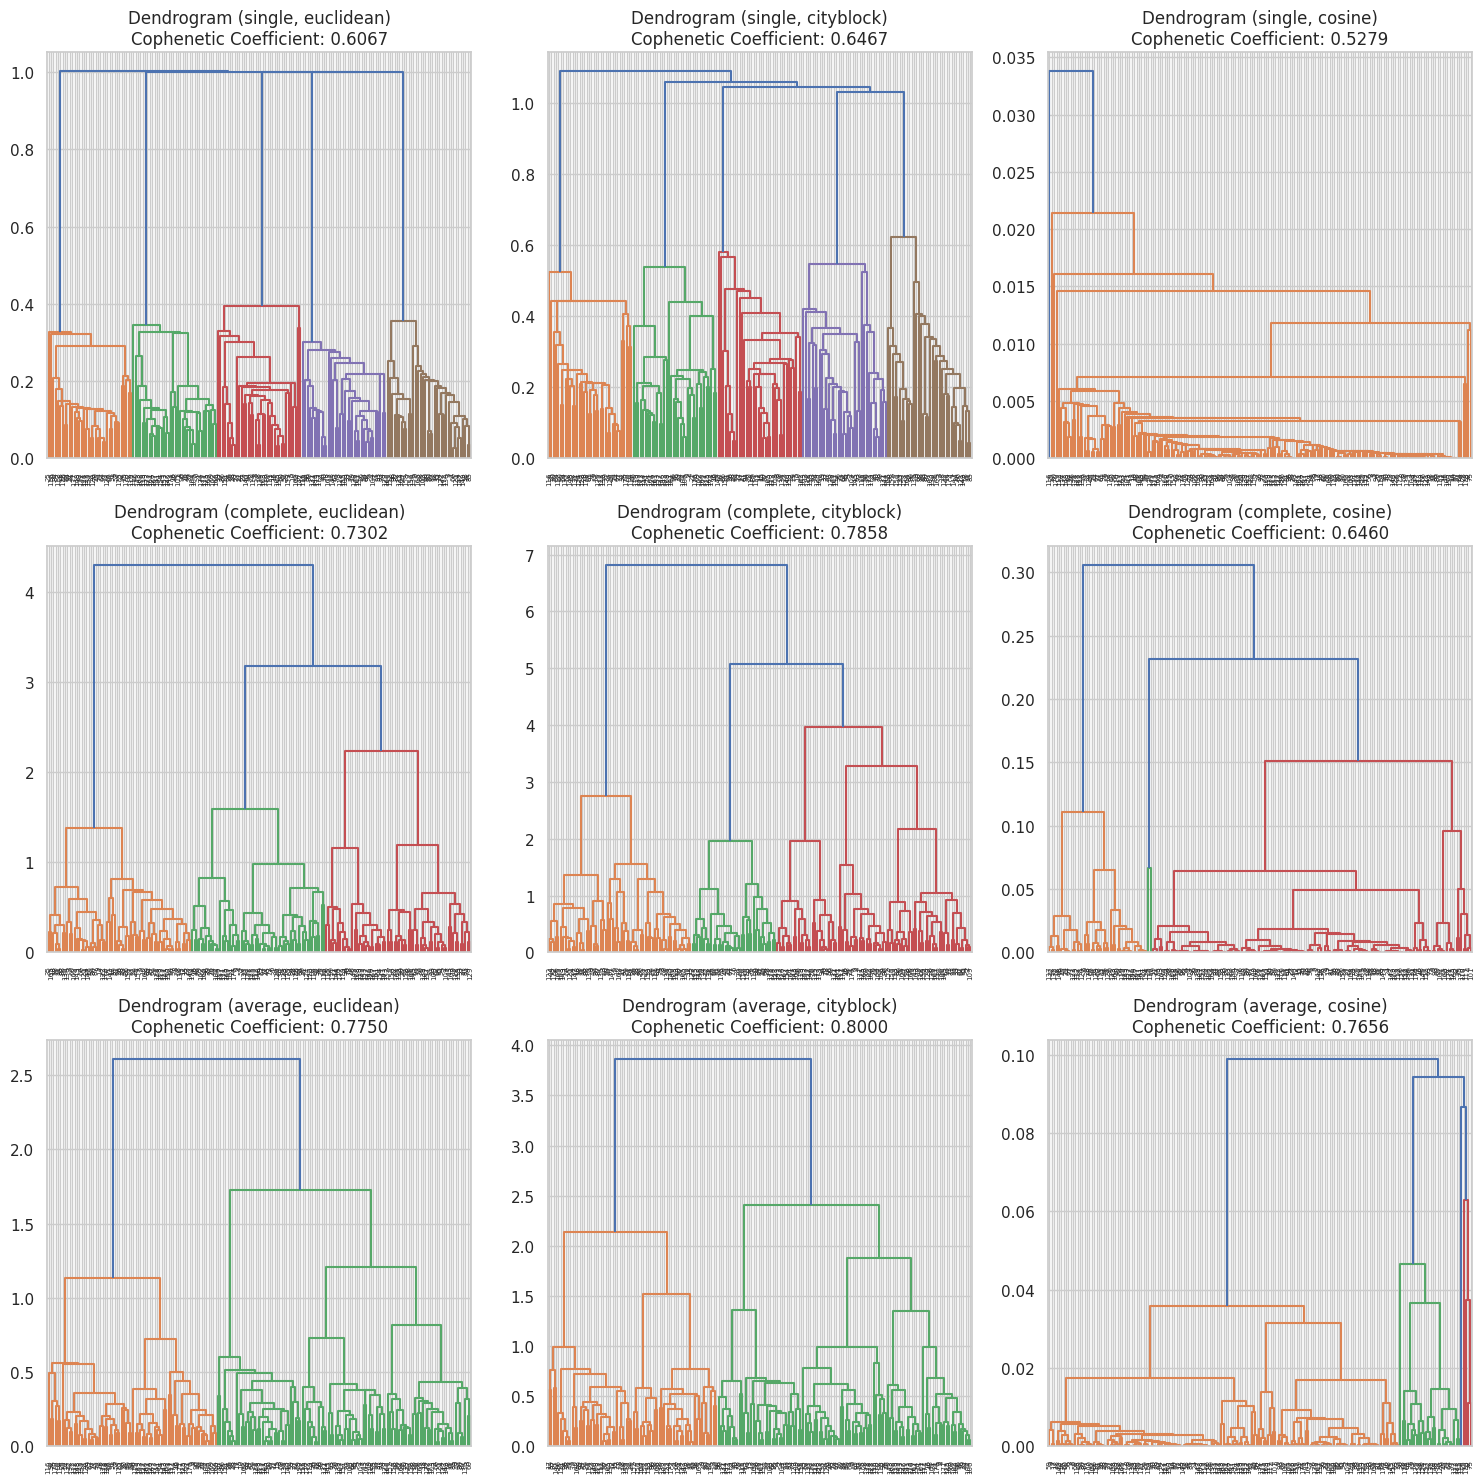

In [ ]:
methods = ['single', 'complete', 'average']
metrics = ['euclidean', 'cityblock', 'cosine']

def plot_dendrogram_cophenet(data, method, metric, ax):
    # Calculate the distance matrix
    distance_matrix = pdist(data, metric)

    # Perform hierarchical clustering
    linkage_matrix = linkage(distance_matrix, method)

    # Calculate the coefficient of cophenetic
    cophenet_coefficient, _ = cophenet(linkage_matrix, distance_matrix)

    # Display the dendrogram
    dendrogram(linkage_matrix, labels=data.index, ax=ax)
    ax.set_title(f'Dendrogram ({method}, {metric})\nCophenetic Coefficient: {cophenet_coefficient:.4f}')

# Grid configuration
grid_size = (3, 3)
fig, axes = plt.subplots(*grid_size, figsize=(15, 15))

# Iterating on methods and metrics
for i, method in enumerate(methods):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        plot_dendrogram_cophenet(df_fruits, method, metric, ax)

plt.tight_layout()
plt.show()

It has been decided to use the distribution obtained with the "average" metric and the "manhattan" method and that the highest value of the cophenet coefficient is obtained.

This coefficient measures the fidelity of the hierarchical representation with respect to the original distances between the data points. Therefore, the closer the value is to 1, the higher the concordance, which means that the structure of the dendrogram faithfully reflects the proximity relationships between the elements.

This choice seeks to maximise the consistency of the clustering with the original distances, thus ensuring a more accurate and meaningful representation of the structure of the data.

The assignment of data points to clusters takes place as well as the creation of a 'Cluster' column to store the assignments.

In [ ]:
linked = linkage(df_fruits, method='average', metric='cityblock')

from scipy.cluster.hierarchy import fcluster

# Desired number of clusters
k = 2

# Assign data points to clusters using the linkage result
clusters = fcluster(linked, k, criterion='maxclust')

# We add a 'Cluster' column to df_fruits to store the cluster assignments.
df_fruits['Cluster'] = clusters

In [ ]:
df_fruits.head()

,weight(kg),length(cm),width(cm),regularity,cleft,Cluster
0,0.140655,0.151122,0.154779,0.599259,2,2
1,0.642582,0.716778,0.687589,0.459053,4,1
2,0.064547,0.115151,0.057061,0.632631,3,2
3,0.670520,0.639797,0.756063,0.559649,4,1
4,0.172447,0.177045,0.256063,0.655494,2,2


# Partitional Clustering

It is perfomed a k-means clustering analysis for a range of cluster numbers (k) and visualize how the inertia changes with the number of clusters.

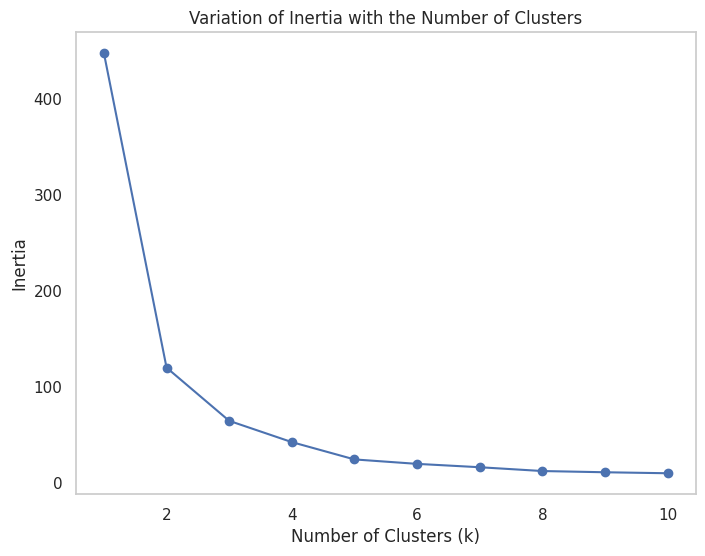

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Empty list to store inertia values
inertia = []

#  Range of the number of clusters to be tested
k_values = range(1, 11)

# K-means
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_fruits)
    inertia.append(kmeans.inertia_)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Variation of Inertia with the Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

## Silhouette scores

This is similar to the previous one, but instead of plotting the inertia, it calculates and visualizes silhouette scores for different numbers of clusters.

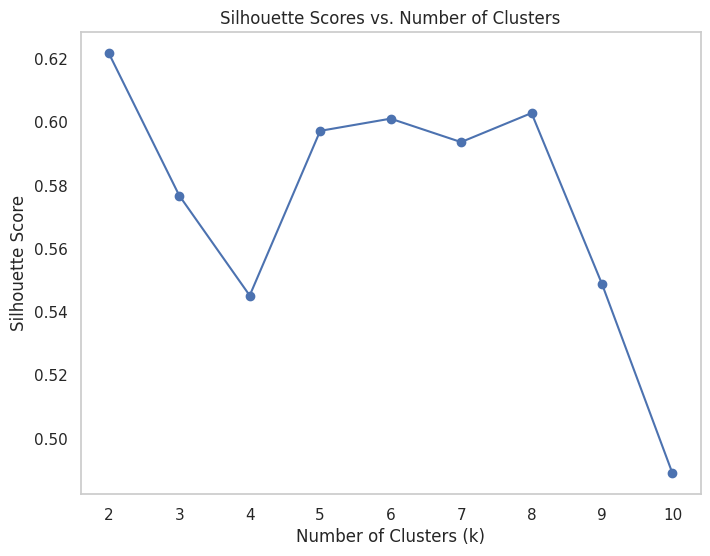

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Define the range of the number of clusters you want to test
k_values = range(2, 11)

silhouette_scores = []

# Perform K-means for different values of k and calculate silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df_fruits)
    silhouette_avg = silhouette_score(df_fruits, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualize the silhouette scores as a function of the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

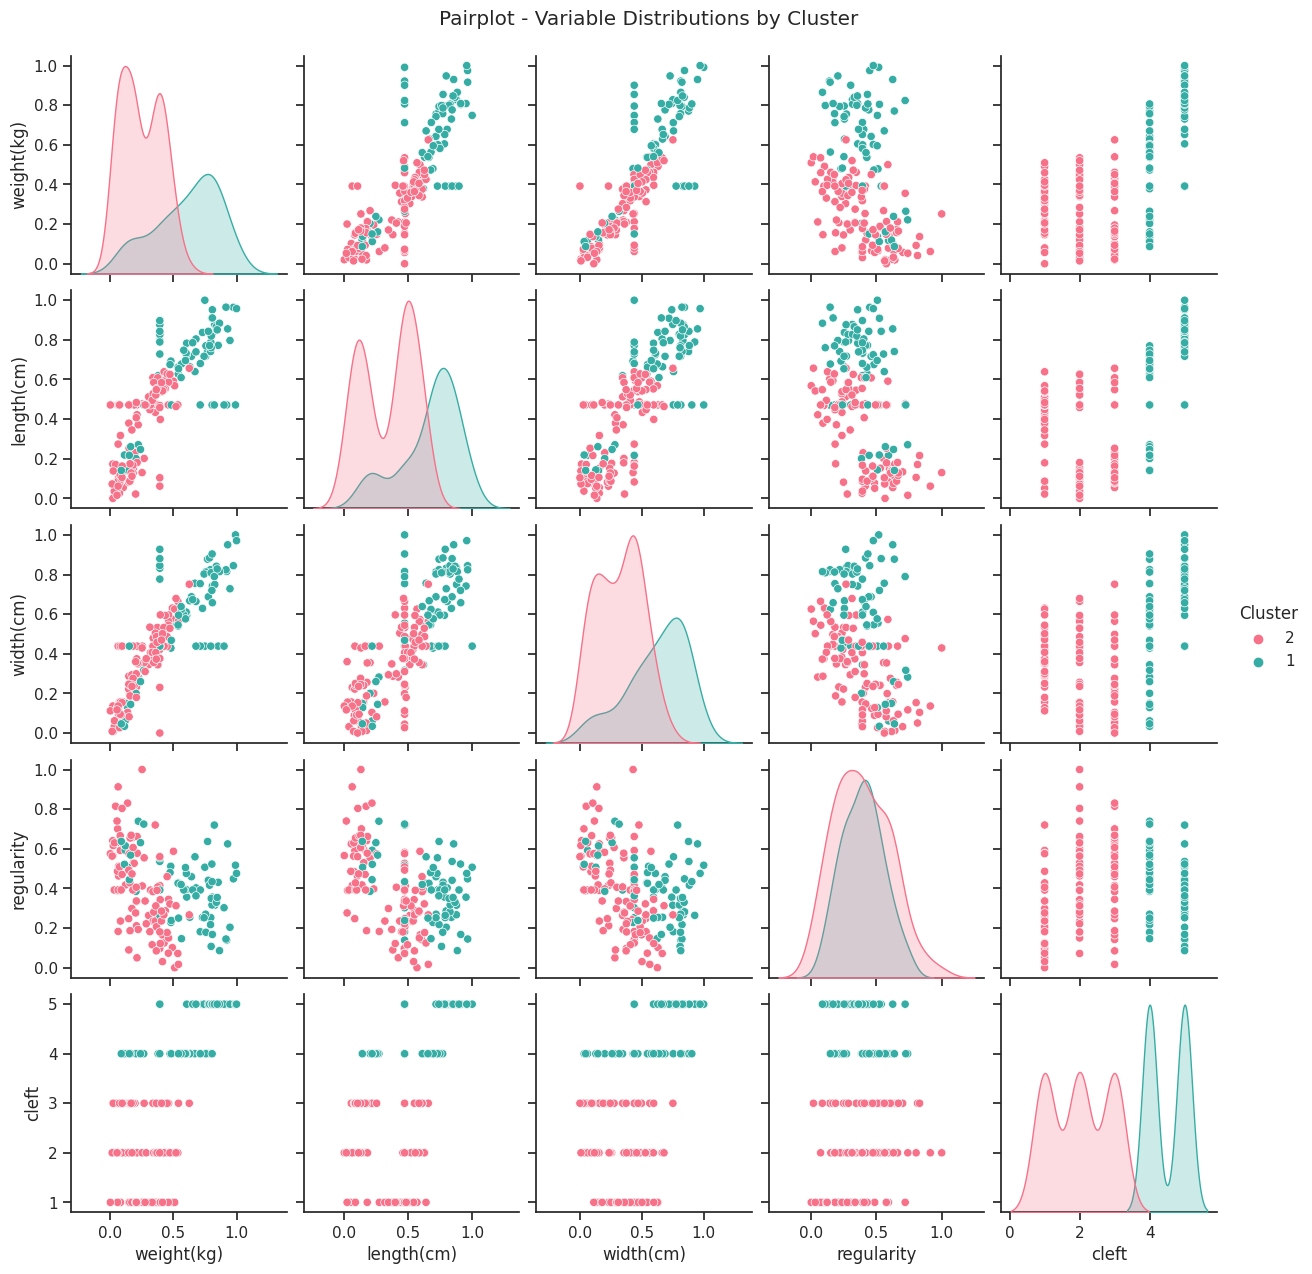

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose 'df_fruits' is your DataFrame with the column 'Cluster' that assigns each point to a cluster.

# Adjusts the color palette according to the number of clusters
palette = sns.color_palette("husl", n_colors=df_fruits['Cluster'].nunique())

# Add 'Cluster' column to pairplot
df_pairplot = df_fruits.copy()
df_pairplot['Cluster'] = df_fruits['Cluster'].astype(str)

# Create the pairplot
sns.set(style="ticks")
sns.pairplot(df_pairplot, hue='Cluster', palette=palette)
plt.suptitle('Pairplot - Variable Distributions by Cluster', y=1.02)
plt.show()

In [ ]:
# Set the label font sizes for axes, xticks, and yticks
mpl.rc("axes", labelsize=14)  # Label size for axes
mpl.rc("xtick", labelsize=12)  # Label size for x-axis ticks
mpl.rc("ytick", labelsize=12)  # Label size for y-axis ticks

We define a function 'plot_silhouette' to visualize silhouette scores for clusters and then applies it to a specific KMeans model with a fixed number of clusters (k).

In [ ]:
# Define a function to plot silhouette scores
def plot_silhouette(model, X):
    # Calculate cluster centers and labels
    mu = model.cluster_centers_
    K, D = mu.shape
    y_pred = model.labels_

    # Calculate silhouette coefficients for each data point
    silhouette_coefficients = silhouette_samples(X, y_pred)
    silhouette_scores = silhouette_score(X, model.labels_)

    cmap = cm.get_cmap("Pastel2")
    colors = [cmap(i) for i in range(K)]
    padding = len(X) // 30
    pos = padding

    # Plot silhouette coefficients for each cluster
    for i in range(K):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i / K)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        pos += len(coeffs) + padding

    # Plot the silhouette score and set the title
    score = silhouette_scores
    plt.axvline(x=score, color="red", linestyle="--")
    plt.title("$k={}, score={:0.2f}$".format(K, score), fontsize=16)

In [ ]:
# Define a range of values for 'k'
Ks = range(1, 9)

# Perform K-means clustering for different values of 'k' and store the models
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_fruits) for k in Ks]

Specifies a range of values for the number of clusters (Ks), performs K-means clustering for each value of 'k', and stores the models in kmeans_per_k.


Then selects a specific model from the list and plot Silhouette Scores for the selected model.

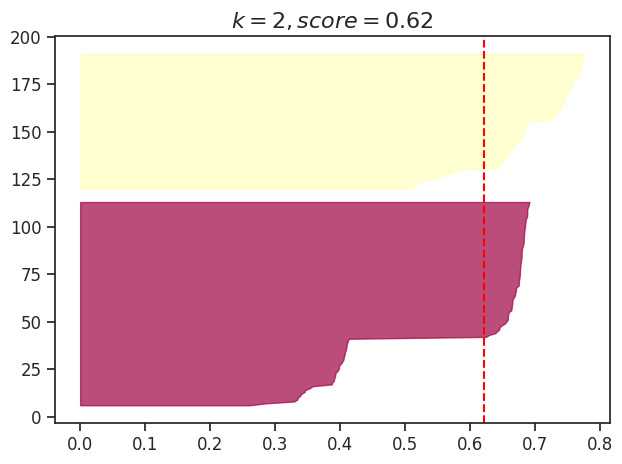

In [ ]:
# Get the clustering model from the list based on an index (e.g., index 2)
model = kmeans_per_k[1]

# Create a new figure and plot the silhouette scores for the selected model
plt.figure()
plot_silhouette(model, df_fruits)

# Ensure a tight layout for better visualization
plt.tight_layout()

## With Single Method and Manhattan Metric:

The function "evaluate_dendogram" has been defined which performs an exhaustive analysis of dendrograms, exploring all possible combinations of methods and metrics by using the product function.

For each combination, it calculates the dendrogram using the linkage function, evaluating its fidelity to the original distances between points using the cophenetic correlation coefficient (cophenet).

In addition, it determines the optimal number of clusters using the 'maxcluster' criterion and assigns labels to the clusters using the fcluster function. In order to evaluate the quality of the clusters, it calculates the silhouette_score.

In [ ]:
def evaluate_dendrogram(data, methods, metrics):
    scores = {}

    for (method, metric) in product(methods, metrics):
        linked = linkage(data, method=method, metric=metric)

        # Cophenetic correlation coefficient
        c, coph_dists = cophenet(linked, pdist(data))

        # Assign cluster labels using the optimal number of clusters
        optimal_num_clusters = np.argmax(coph_dists) + 1
        cluster_labels = fcluster(linked, optimal_num_clusters, criterion='maxclust')

        # Check if there is only one cluster
        if len(np.unique(cluster_labels)) == 1:
            silhouette_score_value = 0
        else:
            silhouette_score_value = silhouette_score(data, cluster_labels)

        scores[(method, metric)] = silhouette_score_value

    scores_df = pd.DataFrame(list(scores.items()), columns=['Parameters', 'Score'])

    return scores_df

methods = ['single', 'complete', 'average']
metrics = ['euclidean', 'cityblock', 'cosine']

scores_table = evaluate_dendrogram(df_fruits2, methods, metrics)
print(scores_table)

              Parameters  Score
0    (single, euclidean)      0
1    (single, cityblock)      0
2       (single, cosine)      0
3  (complete, euclidean)      0
4  (complete, cityblock)      0
5     (complete, cosine)      0
6   (average, euclidean)      0
7   (average, cityblock)      0
8      (average, cosine)      0


After a thorough evaluation of dendrograms using different clustering criteria, such as maxclust, distance, inconsistent, monocrit, and maxdissim, it was consistently observed that the silhouette index trend reached higher values when using the single method with the manhattan distance metric.

The choice to retain the maxclust criterion is based on its ability to establish the optimal number of clusters by minimising the cost function (monocrit), thus providing an effective strategy for creating coherent groups in the dataset.

This influential result led to the decision to carry out a partitional clustering approach using this specific method. In addition to the previous implementation with 'average' and 'manhattan', a new clustering using 'single' with 'manhattan' was chosen.

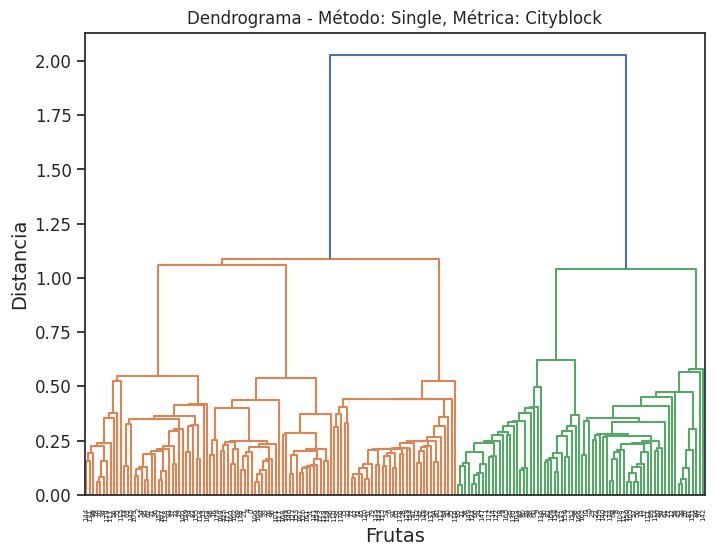

In [ ]:
distance_matrix = pdist(df_fruits, metric='cityblock')

# Perform hierarchical clustering with the 'single' method
linkage_matrix = linkage(distance_matrix, method='single')

# Display the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, labels=df_fruits.index, orientation='top', distance_sort='descending')
plt.title('Dendrograma - Método: Single, Métrica: Cityblock')
plt.xlabel('Frutas')
plt.ylabel('Distancia')
plt.show()

In [ ]:
linked = linkage(df_fruits2, method='single', metric='cityblock')

from scipy.cluster.hierarchy import fcluster

# Define the desired number of clusters
k = 5

# Assign data points to clusters using the linkage result
clusters = fcluster(linked, k, criterion='maxclust')

# Add a 'Cluster' column to your DataFrame to store cluster assignments
df_fruits['Cluster'] = clusters

In [ ]:
df_fruits.head()

,weight(kg),length(cm),width(cm),regularity,cleft,Cluster
0,0.140655,0.151122,0.154779,0.599259,2,4
1,0.642582,0.716778,0.687589,0.459053,4,2
2,0.064547,0.115151,0.057061,0.632631,3,5
3,0.670520,0.639797,0.756063,0.559649,4,2
4,0.172447,0.177045,0.256063,0.655494,2,4


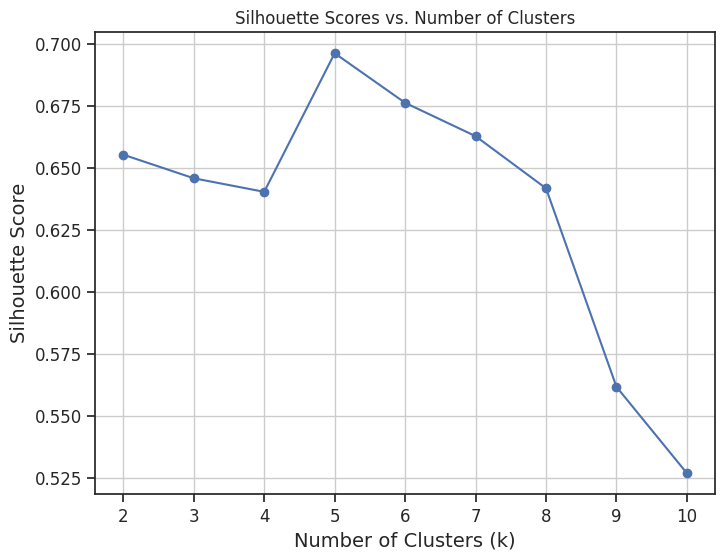

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Define the range of the number of clusters you want to test
k_values = range(2, 11)

silhouette_scores = []

# Perform K-means for different values of k and calculate silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df_fruits2)
    silhouette_avg = silhouette_score(df_fruits, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualize the silhouette scores as a function of the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

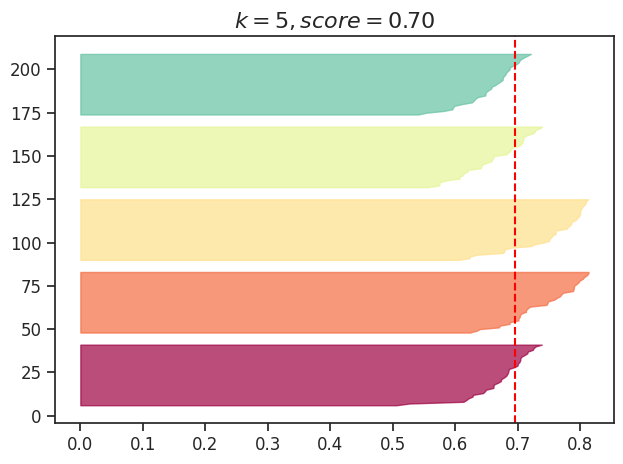

In [ ]:
# Get the clustering model from the list based on an index (e.g., index 2)
model = kmeans_per_k[4]

# Create a new figure and plot the silhouette scores for the selected model
plt.figure()
plot_silhouette(model, df_fruits2)

# Ensure a tight layout for better visualization
plt.tight_layout()

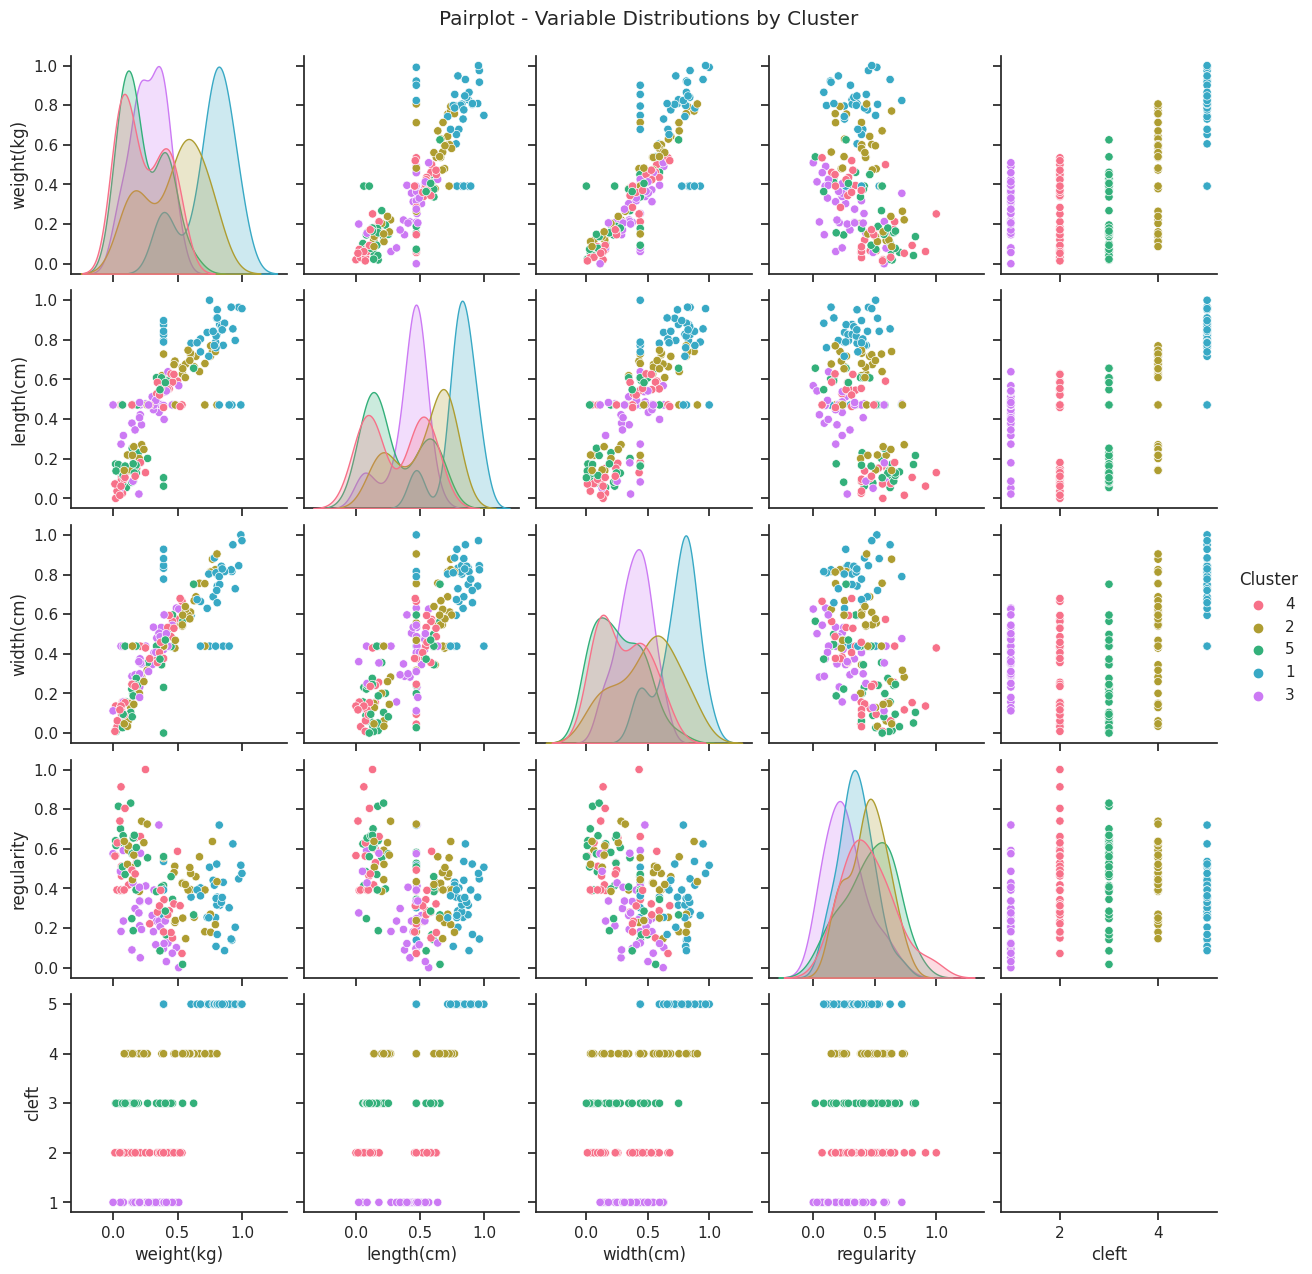

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose 'df_fruits' is your DataFrame with the column 'Cluster' that assigns each point to a cluster.

# Adjusts the color palette according to the number of clusters
palette = sns.color_palette("husl", n_colors=df_fruits['Cluster'].nunique())

# Add 'Cluster' column to pairplot
df_pairplot = df_fruits.copy()
df_pairplot['Cluster'] = df_fruits['Cluster'].astype(str)

# Create the pairplot
sns.set(style="ticks")
sns.pairplot(df_pairplot, hue='Cluster', palette=palette)
plt.suptitle('Pairplot - Variable Distributions by Cluster', y=1.02)
plt.show()